<a href="https://colab.research.google.com/github/delibae/health_care_pr/blob/subin/project_2/%EC%A1%B0%EC%88%98%EB%B9%88/medicine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
cd /content/drive/MyDrive/K-038884_json

/content/drive/MyDrive/K-038884_json


In [13]:
cd /content/drive/MyDrive/K-038884

/content/drive/MyDrive/K-038884


In [16]:
import pandas as pd
import json
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import numpy as np
from sklearn.preprocessing import OneHotEncoder


In [9]:
df = pd.DataFrame()
for i, name in enumerate(glob('*.json')):
  with open(name) as f:
    data = json.load(f)
    json_test = pd.json_normalize(data["images"])
    df = df.append(json_test,ignore_index=True)
# df

df = df[["file_name","drug_N","drug_S","back_color","drug_dir","dl_mapping_code","dl_name","dl_name_en","dl_material","dl_material_en","dl_custom_shape","di_etc_otc_code"]]
df

,file_name,drug_N,drug_S,back_color,drug_dir,dl_mapping_code,dl_name,dl_name_en,dl_material,dl_material_en,dl_custom_shape,di_etc_otc_code
0,K-038890_0_0_0_2_90_260_200.png,K-038890,정상알약,검은색 배경,앞면,K-038890,티아프란정,Tiapran Tab.,티로프라미드염산염,Tiropramide Hydrochloride,"정제, 저작정",전문의약품
1,K-038890_0_0_0_1_75_000_200.png,K-038890,정상알약,검은색 배경,앞면,K-038890,티아프란정,Tiapran Tab.,티로프라미드염산염,Tiropramide Hydrochloride,"정제, 저작정",전문의약품
2,K-038890_0_0_1_0_75_100_200.png,K-038890,정상알약,검은색 배경,뒷면,K-038890,티아프란정,Tiapran Tab.,티로프라미드염산염,Tiropramide Hydrochloride,"정제, 저작정",전문의약품
3,K-038890_0_0_1_0_90_220_200.png,K-038890,정상알약,검은색 배경,뒷면,K-038890,티아프란정,Tiapran Tab.,티로프라미드염산염,Tiropramide Hydrochloride,"정제, 저작정",전문의약품
4,K-038890_0_0_1_0_90_020_200.png,K-038890,정상알약,검은색 배경,뒷면,K-038890,티아프란정,Tiapran Tab.,티로프라미드염산염,Tiropramide Hydrochloride,"정제, 저작정",전문의약품
...,...,...,...,...,...,...,...,...,...,...,...,...
1291,K-038890_0_0_0_1_90_000_200.png,K-038890,정상알약,검은색 배경,앞면,K-038890,티아프란정,Tiapran Tab.,티로프라미드염산염,Tiropramide Hydrochloride,"정제, 저작정",전문의약품
1292,K-038890_0_0_0_1_75_300_200.png,K-038890,정상알약,검은색 배경,앞면,K-038890,티아프란정,Tiapran Tab.,티로프라미드염산염,Tiropramide Hydrochloride,"정제, 저작정",전문의약품
1293,K-038890_0_0_0_1_90_020_200.png,K-038890,정상알약,검은색 배경,앞면,K-038890,티아프란정,Tiapran Tab.,티로프라미드염산염,Tiropramide Hydrochloride,"정제, 저작정",전문의약품
1294,K-038890_0_0_0_1_90_140_200.png,K-038890,정상알약,검은색 배경,앞면,K-038890,티아프란정,Tiapran Tab.,티로프라미드염산염,Tiropramide Hydrochloride,"정제, 저작정",전문의약품


In [10]:
img = df['file_name']
pill = df['dl_name']
target_pill = sorted(list(set(pill)))
print(target_pill)
print(len(target_pill))

['바실리포미스캡슐', '비오메틱스캡슐(바실루스리케니포르미스균)', '에피나레정', '크라틴정 20mg', '티아프란정']
5


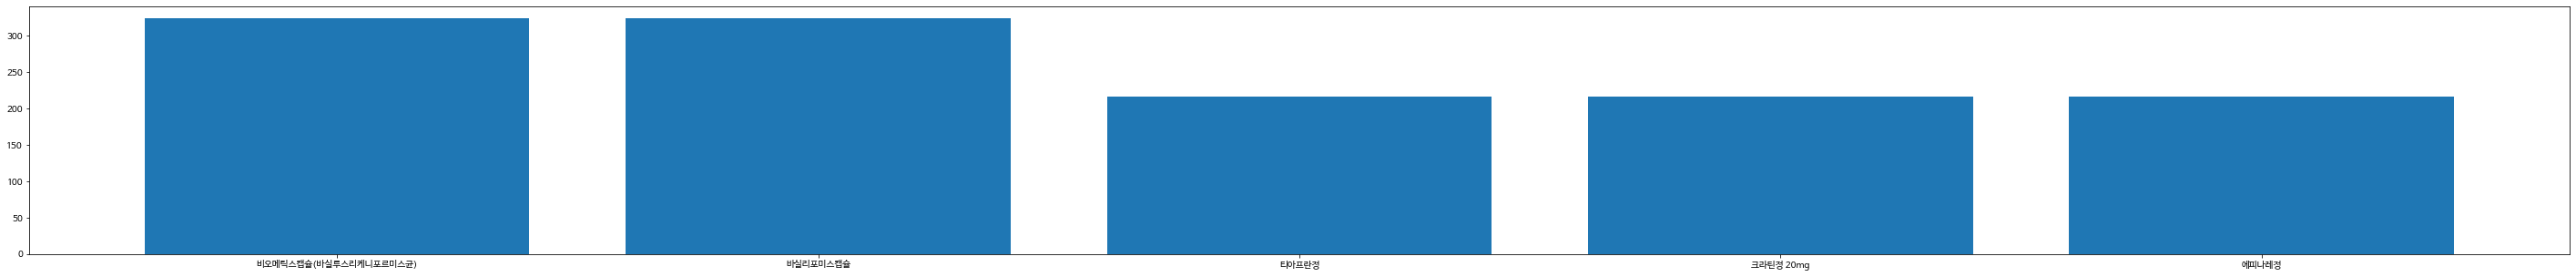

In [11]:
pill = df['dl_name']
cnt = pill.value_counts()
plt.rc('font', family='NanumBarunGothic') 
plt.figure(figsize=(50, 5))
plt.bar(cnt.index, cnt.values)
plt.show()